In [135]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [136]:
def ShowImage(_img_):
    plt.imshow(_img_, cmap='gray')
    print(f"Width of image: {len(_img_[0])}\nHeight of image: {len(_img_)}\nRGB: {_img_[0][0]}")

Width of image: 64
Height of image: 64
RGB: [255 255 255]


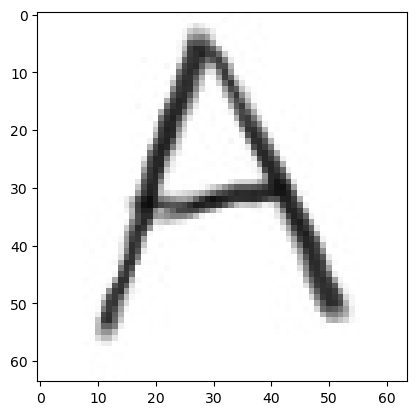

In [137]:
image = img.imread("Image_A02.jpg") #IMG_0734.jpg Image_A02.jpg
ShowImage(image)

In [138]:
def ConvertToGreyscale(_img_):
    image_ = []
    row = []
    for h in range(len(_img_)):
        for w in range(len(_img_[0])):
            row.append(sum(_img_[h][w])//3)
        image_.append(row)
        row = []
    return image_

In [139]:
image = ConvertToGreyscale(image)

Width of image: 64
Height of image: 64
RGB: 255


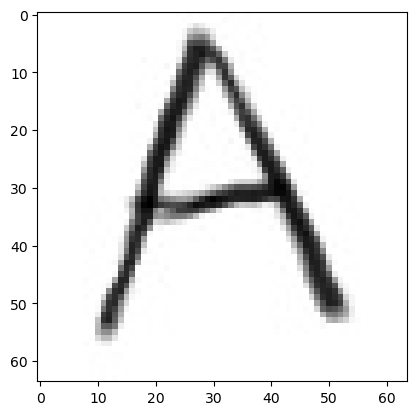

In [140]:
ShowImage(image)

In [141]:
def UpscaleImageClone(_img_, scale=2):  #   Same as Zoom in
    image_ = []
    row = []

    for h in range(len(_img_)):
        for w in range(len(_img_[0])):
            for s in range(scale):
                row.append(_img_[h][w])
        for s in range(scale):
            image_.append(row)
        row = []
    return image_

Width of image: 128
Height of image: 128
RGB: 255


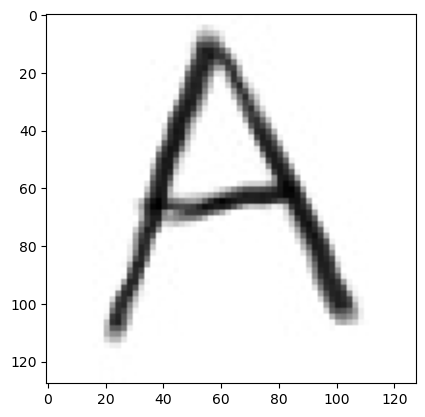

In [142]:
ShowImage(UpscaleImageClone(image,2))

Width of image: 32
Height of image: 32
RGB: 255


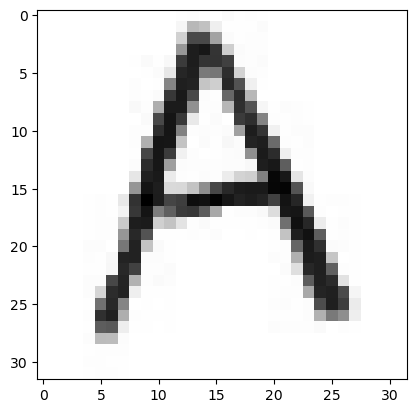

In [143]:
def DownScaleMin(_img_):        #       White pixel value = 255 and Black pixel value = 0
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append(min(_img_[h][w], _img_[h+1][w], _img_[h][w+1], _img_[h+1][w+1]))
        image_.append(row)
        row = []
    return image_

ShowImage(DownScaleMin(image))

Width of image: 32
Height of image: 32
RGB: 255


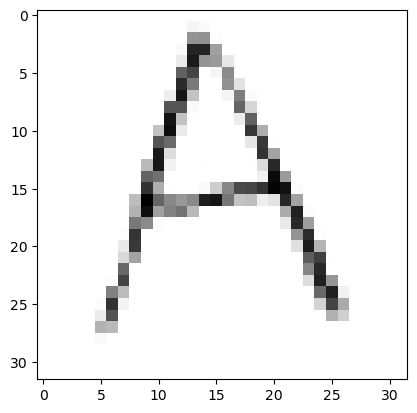

In [144]:
def DownScaleMax(_img_):
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append(max(_img_[h][w], _img_[h+1][w], _img_[h][w+1], _img_[h+1][w+1]))
        image_.append(row)
        row = []
    return image_

ShowImage(DownScaleMax(image))

Width of image: 32
Height of image: 32
RGB: 255


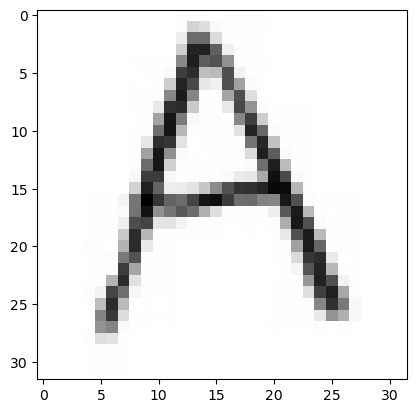

In [145]:
def DownScaleAvg(_img_):
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append((_img_[h][w] + _img_[h+1][w] + _img_[h][w+1] + _img_[h+1][w+1])//4)
        image_.append(row)
        row = []
    return image_

ShowImage(DownScaleAvg(image))

Width of image: 64
Height of image: 64
RGB: 255


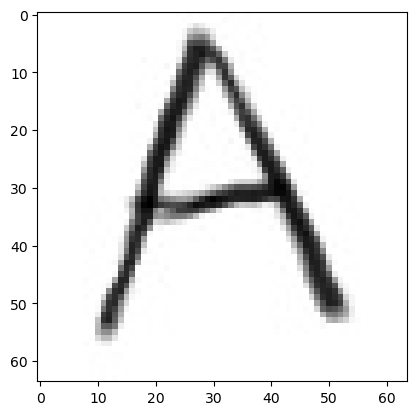

In [146]:
ShowImage(image)

Width of image: 64
Height of image: 64
RGB: 255


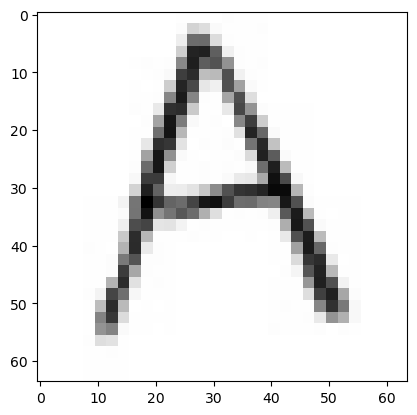

In [147]:
im = image

for i in range(0, 20):
    im = DownScaleAvg(im)
    im = UpscaleImageClone(im)

ShowImage(im)

In [148]:
def transpose(mat):
    row = []
    new_mat = []
    for i in range(len(mat[0])):
        for j in range(len(mat)):
            row.append(mat[j][i])
        new_mat.append(row)
        row = []
    return new_mat

In [149]:
def LERPhorizontal(_img_, scale=2):     # 0 10 -> 0 _ _ _ 10 _ _ _
    image_ = []
    row = []
    a, b, x = 0, 0, 0
    for h in range(len(_img_)):
        for w in range(len(_img_[0])-1):
            a = _img_[h][w]
            b = _img_[h][w+1]
            x = (b - a)//scale
            for s in range(scale):
                row.append(a + s*x)
        for s in range(scale):
            row.append(a + (s+scale)*x)
        # row.append(_img_[h][-1])
        image_.append(row)
        row = []
    return image_

In [150]:
def UpscaleImageLERP(_img_, scale=2):
    _img_ = LERPhorizontal(_img_,scale)
    _img_ = transpose(_img_)
    _img_ = LERPhorizontal(_img_,scale)
    _img_ = transpose(_img_)

    return _img_


Width of image: 128
Height of image: 128
RGB: 255


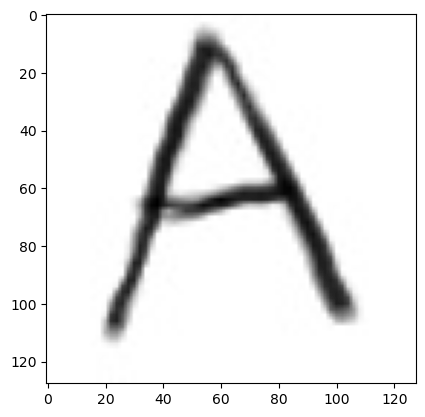

In [151]:
ShowImage(UpscaleImageLERP(image))

Width of image: 128
Height of image: 128
RGB: 255


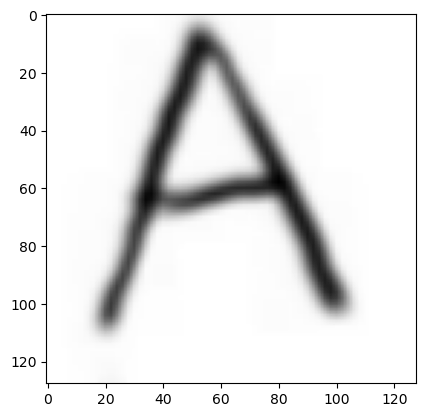

In [152]:
im = image
# im = UpscaleImageLERP(im,4)
# im = DownScaleMax(im)
for i in range(0,5):
    im = UpscaleImageLERP(im,2)
    im = DownScaleAvg(im)
    # im = DownScaleMin(im)
    # im = DownScaleMax(im)
im = UpscaleImageLERP(im)

ShowImage(im)


Width of image: 4
Height of image: 4
RGB: 255


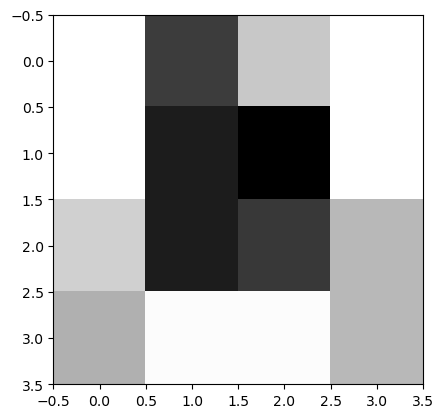

In [154]:
ShowImage(DownScaleAvg(DownScaleAvg(DownScaleAvg(DownScaleAvg(image)))))